In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numba import njit, int32, float32

In [2]:
def normalize(array):
    max = np.max(array)
    return array/max

def draw(field, name = '', xlabel = 'x', ylabel = 'y'): # функция для отрисовки экрана, даем на вход массив яркостей(Е^2)
    field = normalize(field)
    new_field = (np.dstack((field, field, field))*255).astype(int)
    plt.imshow(new_field)
    plt.title(name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def delta(x):
    return np.max(x)-np.min(x)

## 1)Транспорант
задаем форму и размеры обьекта, на котором мы хотим получить дифракцию

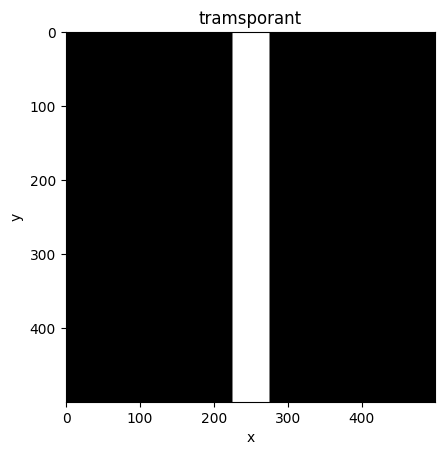

In [15]:
width = 500
tramsporant = np.zeros((width, width)) # наш обьект, от которого мы смотрим дифракцию
cntr = width//2
delt = width//20
start_index = cntr-delt
end_index = cntr+delt

tramsporant[:, start_index:end_index] = 1

draw(tramsporant, "tramsporant") # берем и рисуем для примера щель

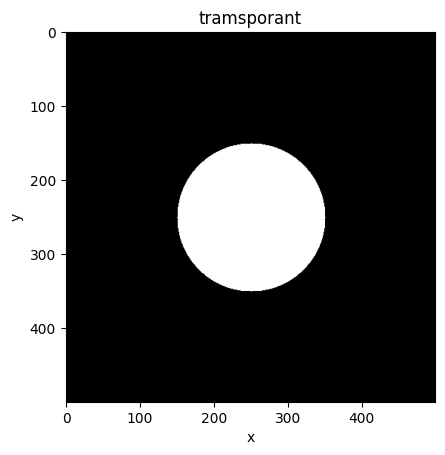

In [16]:
tramsporant = np.zeros((width, width))
center_x, center_y = cntr, cntr

radius = width//5

x, y = np.meshgrid(np.arange(width), np.arange(width))

distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)

tramsporant[distance <= radius] = 1
draw(tramsporant, "tramsporant")

задаем начальные условия, для которых мы изучаем дифракцию

In [17]:
z = 0.7
screen = np.zeros(tramsporant.shape)
lambd = 500*10**(-9)
k = 2*np.pi/lambd
scale = 20000

## 2)Получение изображения
Далее мы создаем цикл, сложности $n^4$ в котором для каждой точки экрана, на котором мы ходим увидеть дифракцию, берем дискретно интеграл френеля, и записываем в соответствующую точку квадрат модуля комплексной напряженности

$Screen_i = Re(E)^2+ Im(E)^2$

In [18]:
@njit(fastmath = True)
def calculus_1(tramsporant, screen): # функция, котора как раз прогоняет каждую точку экрана, а для нее прогоняет каждую точку транспоранта
    for screen_x in range(screen.shape[0]):
        print("screen_x = ", screen_x)
        for screen_y in range(screen.shape[1]):
            Re = 0
            Im = 0
            for tr_x in range(tramsporant.shape[0]):
                for tr_y in range(tramsporant.shape[1]):
                    dx = (screen_x - tr_x)/scale
                    dy = (screen_y - tr_y)/scale

                    ro = np.sqrt(dx**2 + dy**2)
                    R = np.sqrt(ro**2 + z**2)
                    alpha = np.arctan(ro/z)

                    koef = tramsporant[tr_x][tr_y]*np.cos(alpha)/(lambd*R)

                    Im += (-1)*koef*np.cos(k*R)
                    Re += koef*np.sin(k*R)

            screen[screen_x][screen_y] = Im**2 + Re**2
    return screen

In [ ]:
screen = calculus_1(tramsporant, screen)
draw(screen)

screen_x =  0
screen_x =  1
screen_x =  2
screen_x =  3
screen_x =  4
screen_x =  5
screen_x =  6
screen_x =  7
screen_x =  8
screen_x =  9
screen_x =  10
screen_x =  11
screen_x =  12
screen_x =  13
screen_x =  14
screen_x =  15
screen_x =  16
screen_x =  17
screen_x =  18
screen_x =  19
screen_x =  20
screen_x =  21
screen_x =  22
screen_x =  23
screen_x =  24
screen_x =  25
screen_x =  26
screen_x =  27
screen_x =  28
screen_x =  29
screen_x =  30
screen_x =  31
screen_x =  32
screen_x =  33
screen_x =  34
screen_x =  35
screen_x =  36
screen_x =  37
screen_x =  38
screen_x =  39
screen_x =  40
screen_x =  41
screen_x =  42
screen_x =  43
screen_x =  44
screen_x =  45
screen_x =  46
screen_x =  47
screen_x =  48
screen_x =  49
screen_x =  50
screen_x =  51
screen_x =  52
screen_x =  53
screen_x =  54
screen_x =  55
screen_x =  56
screen_x =  57
screen_x =  58
screen_x =  59
screen_x =  60
screen_x =  61
screen_x =  62
screen_x =  63
screen_x =  64
screen_x =  65
screen_x =  66
scree